In [1]:
import os
from utils import DATA_DIR, CHART_DIR
import scipy as sp
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv')
data = pd.read_csv('TSLA.csv')
random_num = np.random.randn(100) # กี่ตัวก็ว่าไป

data_x = np.genfromtxt(r'x.csv',delimiter=',')
data_y = np.genfromtxt(r'y.csv',delimiter=',')

#  Task 1 : Graph and Prediction

In [3]:
x=data['Day']
y=data['Adj Close']
x=x.array
y=y.array

miny=min(y)
maxy=max(y)
sumy=sum(y)
meany=sumy/len(y)
n=len(y)
sdy = (sum((y-meany)**2)/(n-1))**0.5
skew_y = (sum((y-meany)**3)/(n-1))/(sdy**3)
kurr_y = (sum((y-meany)**4)/(n-1))/(sdy**4)

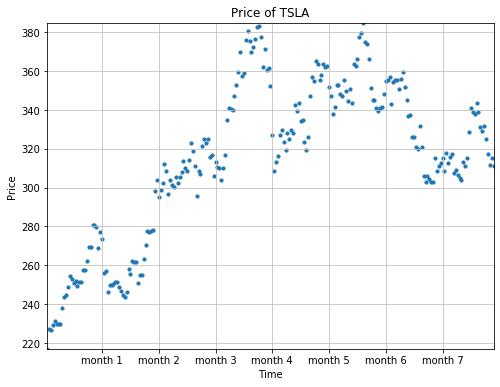

In [4]:
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' plot input data '''

    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Price of TSLA")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.xticks(
        [m * 30 for m in range(10)], ['month %i' % m for m in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=miny)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

# first look at the data
plot_models(x, y, None, os.path.join(CHART_DIR, "figure1.png"))

Model parameters of fp1: [  0.39322508 267.92933858]
Error of the model of fp1: [217150.86669692]


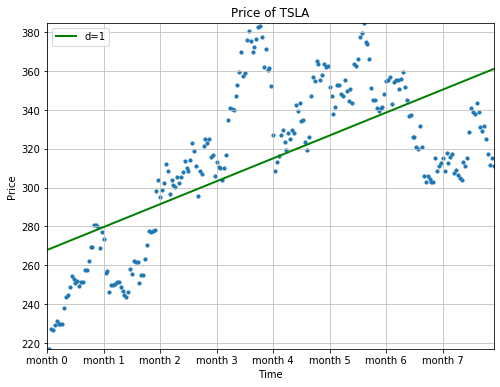

In [5]:
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full=True) # polynomials degree 1 -> Linear Function
print("Model parameters of fp1: %s" % fp1)
print("Error of the model of fp1:", res1)
f1 = sp.poly1d(fp1) # สิ่งที่ได้ model [b1 b0] error => var

plot_models(x, y, [f1], os.path.join(CHART_DIR, "modelf1.png"))

In [8]:
data = sp.genfromtxt(os.path.join(DATA_DIR, "web_traffic.tsv"), delimiter="\t")
print(data[:10])
print(data.shape)

# all examples will have three classes in this file
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

x = data[:, 0]
y = data[:, 1]
print("Number of invalid entries:", sp.sum(sp.isnan(y)))
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]
(743, 2)
Number of invalid entries: 8


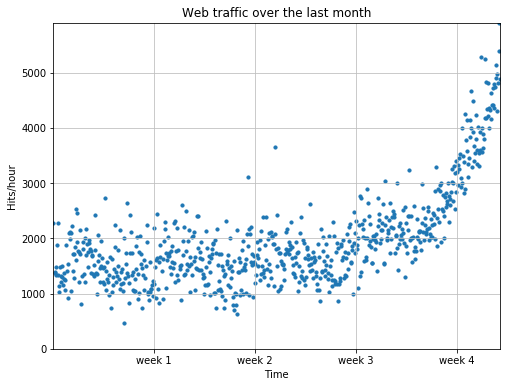

In [9]:
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' plot input data '''

    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

# first look at the data
plot_models(x, y, None, os.path.join(CHART_DIR, "1.png"))

In [10]:
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full=True)
print("Model parameters of fp1: %s" % fp1)
print("Error of the model of fp1:", res1)
f1 = sp.poly1d(fp1)

Model parameters of fp1: [  2.59619213 989.02487106]
Error of the model of fp1: [3.17389767e+08]


Model parameters of fp2: [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
Error of the model of fp2: [1.79983508e+08]
Model parameters of fp10: [-3.73981969e-22  1.36473757e-18 -2.14294407e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604589e-05  1.19167041e-02
 -9.41618607e-01  3.33703840e+01  1.26421204e+03]
Error of the model of fp10: [1.21942326e+08]


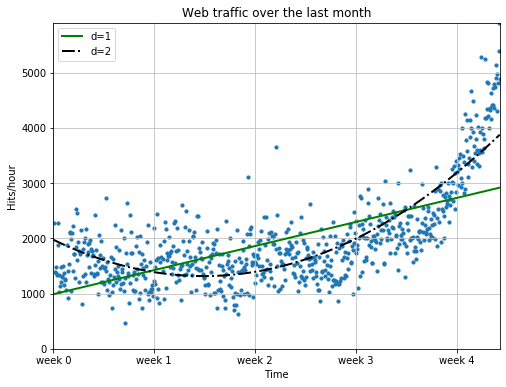

In [19]:
fp2, res2, rank2, sv2, rcond2 = sp.polyfit(x, y, 2, full=True)
print("Model parameters of fp2: %s" % fp2)
print("Error of the model of fp2:", res2)
f2 = sp.poly1d(fp2)

fp10, res10, rank10, sv10, rcond10 = sp.polyfit(x, y, 10, full=True)
print("Model parameters of fp10: %s" % fp10)
print("Error of the model of fp10:", res10)
f10 = sp.poly1d(fp10)

plot_models(x, y, [f1, f2], os.path.join(CHART_DIR, "3.png"))

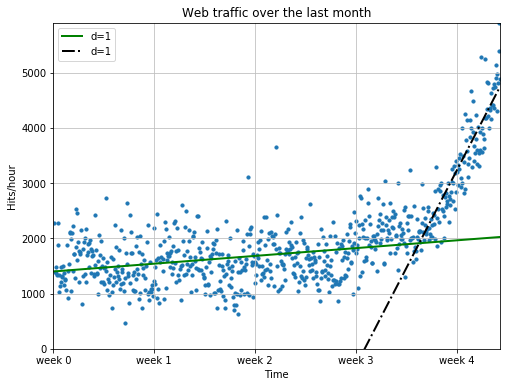

In [12]:
# fit and plot a model using the knowledge about inflection point
inflection = 3.5 * 7 * 24
inflection =int(inflection)
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "4.png"))

In [13]:
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

print("Errors for the complete data set:")
for f in [f1, f2]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errors for only the time after inflection point")
for f in [fa, fb]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error inflection=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Errors for only the time after inflection point
Error d=1: 355099704.983769
Error d=1: 22143941.107618
Error inflection=132950348.197616


Trained only on data after inflection point
Errors for only the time after inflection point
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.608482


C:\Users\Lenovo Demo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]
C:\Users\Lenovo Demo\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RankWarning: Polyfit may be poorly conditioned
C:\Users\Lenovo Demo\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RankWarning: Polyfit may be poorly conditioned


fbt2(x)= 
         2
0.05796 x - 57.02 x + 1.53e+04
fbt2(x)-100,000= 
         2
0.05796 x - 57.02 x - 8.47e+04
fbt2(x)= 
         2
0.06302 x - 62.97 x + 1.7e+04
fbt2(x)-100,000= 
         2
0.06302 x - 62.97 x - 8.3e+04
Test errors for only the time after inflection point
Error d=1: 7868639.638139
Error d=2: 6610812.628517
Error d=3: 6648730.669090
Error d=10: 6487058.452752
         2
0.06302 x - 62.97 x + 1.7e+04
         2
0.06302 x - 62.97 x - 8.3e+04
100,000 hits/hour expected at week 10.424925


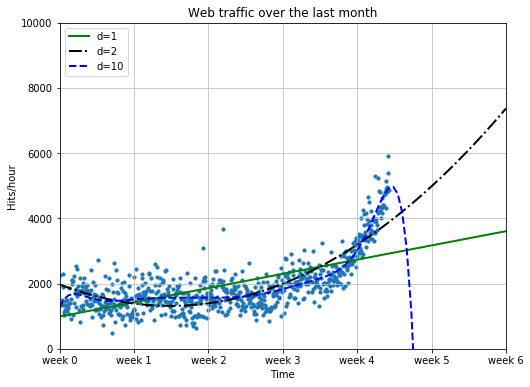

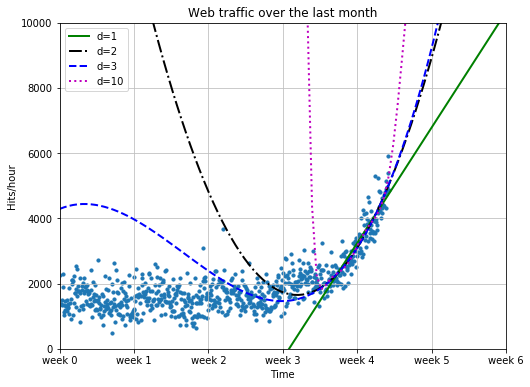

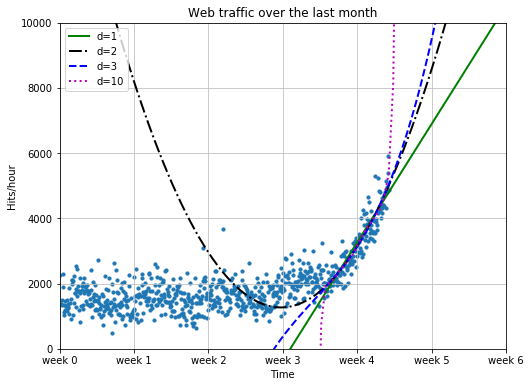

In [21]:
# extrapolating into the future
plot_models(
    x, y, [f1, f2,f10],
    os.path.join(CHART_DIR, "6.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)


print("Trained only on data after inflection point")
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))


print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

plot_models(
    x, y, [fb1, fb2, fb3, fb10],
    os.path.join(CHART_DIR, "7.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)


# separating training from testing data
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))


print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))


# separating training from testing data
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))


print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))


print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10],
    os.path.join(CHART_DIR, "8.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)


from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
reached_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

# Symbol and Function

In [22]:
from sympy import Symbol,symbols
from sympy import solve 
from sympy import limit, sin, diff, cos,exp, sqrt
from sympy import Rational
from sympy import integrate

x = Symbol('x')
y,z = symbols('y,z')

expression = (x + y)**8
expression.expand() # solve function "expression" (ยกกำลังไป)

# solve equation = 0, Find x
solve(x**2 + x + 2)

# limit(equation, ค่า x , เมื่อ x เข้าสู่ 0)
limit(1 / x, x, 0)

# diff(equation , เทียบ x)
diff(cos(x), x)

x, y,α,β =Symbol('x'), Symbol('y'),Symbol('α'),Symbol('β'), # พิมพ์สัญลักษณ์ \alpha แล้วกด tab => α
k =(α*x**2+β*x+5)**2
k.expand()
# solve(function,หาค่า x), ให้ k = 0 หาค่า x
solve(k,x)

# solve and subs
Q,P = Symbol('Q'),Symbol('P')
supply = 100 + 50*P
demand = 150 - 25*P
E = demand - supply
pe = solve(E,P)
# แทนค่า P ด้วย 2/3 , ถ้าจะแทนหลายค่าก็ .subs().subs() ต่อไปเรื่อยๆ
demand.subs(P,2/3)

# rational
a = Rational(1, 10)
# a = 1/10

In [23]:
# diff chain rule
x,y = Symbol('x'),Symbol('y')
r = exp(x/y)
def z(x,y):
    return exp(exp(x/y)+2*x+y)

print("dz by dx = ",diff(z(x,y),x))
print("dz by dy = ",diff(z(x,y),y))
print("dz^2 by dxdy = ",diff(z(x,y),x,1,y,1))
diff(z(x,y),x).subs(x,2).subs(y,2)

dz by dx =  (2 + exp(x/y)/y)*exp(2*x + y + exp(x/y))
dz by dy =  (-x*exp(x/y)/y**2 + 1)*exp(2*x + y + exp(x/y))
dz^2 by dxdy =  -((2 + exp(x/y)/y)*(x*exp(x/y)/y**2 - 1) + (x/y + 1)*exp(x/y)/y**2)*exp(2*x + y + exp(x/y))


(E/2 + 2)*exp(E + 6)

In [24]:
# integrate(function, (เทียบ x, ตั้งแต่ 0, ถึง 1))
integrate(x**2, (x,0,1))

1/3

# Machine Learning แยกดอกไม้

In [1]:
from matplotlib import pyplot as plt
import numpy as np
# We load the data with load_iris from sklearn
from sklearn.datasets import load_iris
data = load_iris()
# load_iris returns an object with several fields
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names
for t in range(3):
 if t == 0:
     c = 'r'
     marker = '>'
 elif t == 1:
     c = 'g'
     marker = 'o'
 elif t == 2:
     c = 'b'
     marker = 'x'
 plt.scatter(features[target == t, 0],
            features[target == t, 1],
            marker=marker,
            c=c)

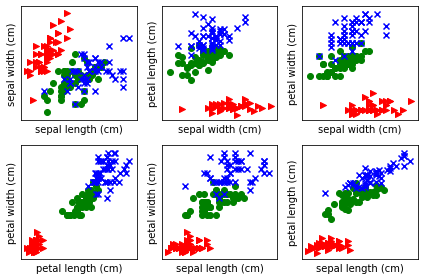

In [8]:
fig,axes = plt.subplots(2, 3)
pairs = {(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)}
# Set up 3 different pairs of (color, marker)
color_markers = [
        ('r', '>'),
        ('g', 'o'),
        ('b', 'x')
        ]
for i, (p0, p1) in enumerate(pairs):
    ax = axes.flat[i]

    for t in range(3):
        # Use a different color/marker for each class `t`
        c,marker = color_markers[t]
        ax.scatter(features[target == t, p0],
                   features[target == t, p1],
                   marker=marker, c=c)
    ax.set_xlabel(feature_names[p0])
    ax.set_ylabel(feature_names[p1])
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.savefig('figure1.png')

In [33]:
labels = target_names[target]

# The petal length is the feature at position 2
plength = features[:, 2]

# Build an array of booleans:
is_setosa = (labels == 'setosa')

# This is the important step:
max_setosa =plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()
print('Maximum of setosa: {0}.'.format(max_setosa))

print('Minimum of others: {0}.'.format(min_non_setosa))

# ~ is the boolean negation operator
features2 = features[~is_setosa]
labels2 = labels[~is_setosa]
# Build a new target variable, is_virigina
is_virginica = (labels2 == 'virginica')

Maximum of setosa: 1.9.
Minimum of others: 3.0.


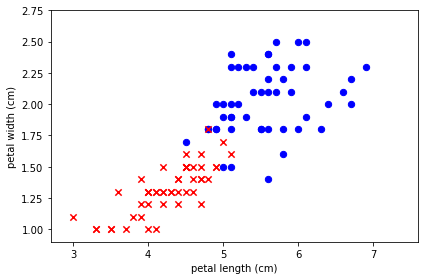

In [34]:
f0, f1 = 2, 3
#plot the scatter plot
fig,ax = plt.subplots()

# features2 = features[~is_setosa]
# ตั้งค่าแกน x, y = min*0.9 , max*1.1  => ตั้งให้แกนห่างจาก min,max นิดนึง (จะไม่ตั้งก็แล้วแต่ ดีไม่ดีจะสวยกว่า)
x0 = features2[:, f0].min() * .9
x1 = features2[:, f0].max() * 1.1

y0 = features2[:, f1].min() * .9
y1 = features2[:, f1].max() * 1.1

# is_virginica = (labels2 == 'virginica')
# s = size of marker
ax.scatter(features2[is_virginica, f0],
            features2[is_virginica, f1], c='b', marker='o', s=40)
ax.scatter(features2[~is_virginica, f0],
            features2[~is_virginica, f1], c='r', marker='x', s=40)
ax.set_ylim(y0, y1)
ax.set_xlim(x0, x1)
ax.set_xlabel(feature_names[f0])
ax.set_ylabel(feature_names[f1])
fig.tight_layout()
fig.savefig('figure2.png')


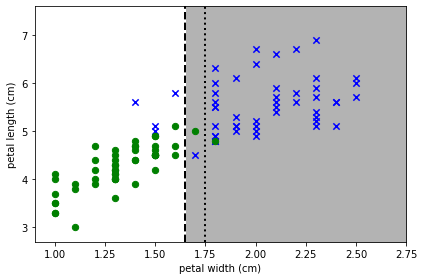

In [35]:
COLOUR_FIGURE = False

# Hand fixed thresholds: ตั้งเส้นแบ่ง
t = 1.65
t2 = 1.75

# Features to use: 3 & 2
f0, f1 = 3, 2

# set color แยกโซนดอกไม้
if COLOUR_FIGURE:
    area1c = (1., .8, .8)
    area2c = (.8, .8, 1.)
else:
    area1c = (1., 1, 1)
    area2c = (.7, .7, .7)

# Plot from 90% of smallest value to 110% of largest value
# (all feature values are positive, otherwise this would not work very well)

x0 = features2[:, f0].min() * .9
x1 = features2[:, f0].max() * 1.1

y0 = features2[:, f1].min() * .9
y1 = features2[:, f1].max() * 1.1

fig,ax = plt.subplots()
# fill สีในกราฟ เริ่มตั้งแต่ t ถึง x1 (สีเทา) และ x1 ถึง t (สีขาว)
ax.fill_between([t, x1], [y0, y0], [y1, y1], color=area2c)
ax.fill_between([x0, t], [y0, y0], [y1, y1], color=area1c)
# ตั้งเส้นตรงในรูป
ax.plot([t, t], [y0, y1], 'k--', lw=2)
ax.plot([t2, t2], [y0, y1], 'k:', lw=2)
ax.scatter(features2[is_virginica, f0],
            features2[is_virginica, f1], c='b', marker='x', s=40)
ax.scatter(features2[~is_virginica, f0],
            features2[~is_virginica, f1], c='g', marker='o', s=40)
ax.set_ylim(y0, y1)
ax.set_xlim(x0, x1)
ax.set_xlabel(feature_names[f0])
ax.set_ylabel(feature_names[f1])
fig.tight_layout()
fig.savefig('figure3.png')

In [36]:
# Initialize best_acc to impossibly low value
# ให้คอมถึก ลองทีละ feature ทีละตัว
best_acc = -1.0
# features2.shape[i] , shape ใช้หาจำนวน row, collum => 0 = row, 1 = collum
# for แรก เช็ค collum
for fi in range(features2.shape[1]):
    # We are going to test all possible thresholds
    thresh = features2[:,fi]
    # for นี้ หยิบทีละตัวใน collum fi มาเทียบว่าเหมาะจะเป็นตัวแยกมั้ย
    for t in thresh:

        # เทียบๆไป
        # Get the vector for feature `fi`
        feature_i = features2[:, fi]
        # pred is boolean type
        pred = (feature_i > t)
        # ใส่ mean จะออกมาระหว่าง 0-1
        acc = (pred == is_virginica).mean()
        rev_acc = (pred == ~is_virginica).mean()
        # ดูว่า feature_i > t เป็น virginica หรือ versicolor จะแม่นกว่า
        # ถ้าต้อง reverse ก็ใส่ acc = rev_acc
        if rev_acc > acc:
            reverse = True
            acc = rev_acc
        else:
            reverse = False

        # ถ้าเป็น best_acc ก็บันทึกไว้
        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t
            best_reverse = reverse

print(best_fi, best_t, best_reverse, best_acc)

3 1.6 False 0.94


In [38]:
def is_virginica_test(fi, t, reverse, example):
    'Apply threshold model to a new example'
    test = example[fi] > t
    if reverse:
        test = not test
    return test
from threshold import fit_model, predict

# ning accuracy was 96.0%.
# ing accuracy was 90.0% (N = 50).
correct = 0.0

for ei in range(len(features2)):
    # select all but the one at position `ei`:
    training = np.ones(len(features2), bool)
    training[ei] = False
    testing = ~training
    model = fit_model(features2[training], is_virginica[training])
    predictions = predict(model, features2[testing])
    correct += np.sum(predictions == is_virginica[testing])
acc = correct/float(len(features2))
print('Accuracy: {0:.1%}'.format(acc))

Accuracy: 87.0%


# Task 2

In [39]:
import requests

data_x = np.genfromtxt(r'x.csv',delimiter=',')
data_y = np.genfromtxt(r'y.csv',delimiter=',')

header_x = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Number of concave portions of contour', 'Symmetry', 'Fractal dimension']
header_y = [('Malignant', [1]),('Benign' ,[0])]
label_y = [1 =='Malignant', 0 == 'Benign']

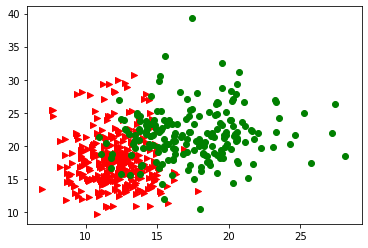

In [40]:
for t in range(2):
 if t == 0:
     c = 'r'
     marker = '>'
 elif t == 1:
     c = 'g'
     marker = 'o'
 plt.scatter(data_x[data_y == t, 0],
            data_x[data_y == t, 1],
            marker=marker,
            c=c)

In [41]:
nub = 0
pairs = []
for i in range(10):
    for j in range(10):
        if i < j:
            pairs.insert(nub,(i,j))
            nub = nub+1
print(nub," pairs")
pairs

45  pairs


[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

C:\Users\Lenovo Demo\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


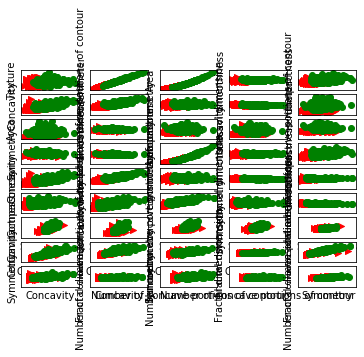

In [42]:
fig,axes = plt.subplots(9, 5)

# Set up 3 different pairs of (color, marker)
color_markers = [
        ('r', '>'),
        ('g', 'o'),
        ]
for i, (p0, p1) in enumerate(pairs):
    ax = axes.flat[i]

    for t in range(2):
        # Use a different color/marker for each class `t`
        c,marker = color_markers[t]
        ax.scatter(data_x[data_y == t, p0],
                   data_x[data_y == t, p1],
                   marker=marker, c=c)
    ax.set_xlabel(header_x[p0])
    ax.set_ylabel(header_x[p1])
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.savefig('figure1.png')